In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score,mean_squared_error

In [12]:
arr = load_iris()
print('Target values are: '+str(arr.target))
print('\nThe variable arr is of type: '+str(type(arr)))
print('\nThe description of dataset is: '+str(arr.DESCR))
print('\nFeature names are: '+str(arr.feature_names))
print('\nTarget names are: '+str(arr.target_names))

Target values are: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

The variable arr is of type: <class 'sklearn.utils.Bunch'>

The description of dataset is: .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ==============

In [13]:
# Converting the loaded dataset to pandas Data frame for easier operations..
df = pd.DataFrame(arr.data, columns = arr.feature_names)
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
# describing the values for seeing the distribution of the dataset
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
stdScaler = StandardScaler()
df_temp = stdScaler.fit_transform(df)
df = pd.DataFrame(df_temp, columns=arr.feature_names)
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [16]:
# Appending the target variable to our dataframe.....
df['Target'] = arr.target
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [17]:
#Getting our X and Y variables for building our model...
# X is the independent variable i.e. feature columns of our model...  
X = df.drop(['Target'],axis =1)
# Y is the dependent variable whose values we are gonna predict...
Y = df['Target']
# Splitting the dataset into training and testing dataset...
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 101)

In [18]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, Y_train)
Y_predicted = knn.predict(X_test)

In [19]:
print('Accuracy Score is: '+str(accuracy_score(Y_test, Y_predicted)))
print('Confusion matrix is:\n'+str(confusion_matrix(Y_test, Y_predicted)))

Accuracy Score is: 1.0
Confusion matrix is:
[[19  0  0]
 [ 0 26  0]
 [ 0  0 15]]


Neighbors at minimum score is: 7
Minimum Error Rate Score is: 0.0


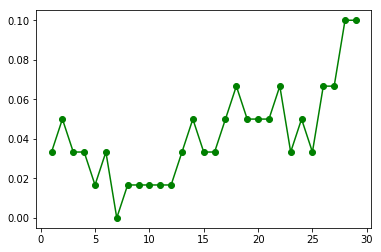

In [20]:
# now using the elbow method to get proper value of 'K' i.e. no. of nearest neighbors to check for....
errors_score = []
min_value = 1000
min_neighbors = 1
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, Y_train)
    y_predicted_i = knn.predict(X_test)
    errors_score.append(np.mean(y_predicted_i!=Y_test))
    if(errors_score[i-1]<min_value):
        min_neighbors = i
        min_value = errors_score[i-1]
        
plt.plot(range(1,30), errors_score, marker ='o', color='green')
print('Neighbors at minimum score is: '+str(min_neighbors))        
print('Minimum Error Rate Score is: '+str(min(errors_score)))